## Import Libaries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import warnings
import pickle

## Load Dataset

In [58]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [59]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Exploring Categories

In [60]:

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

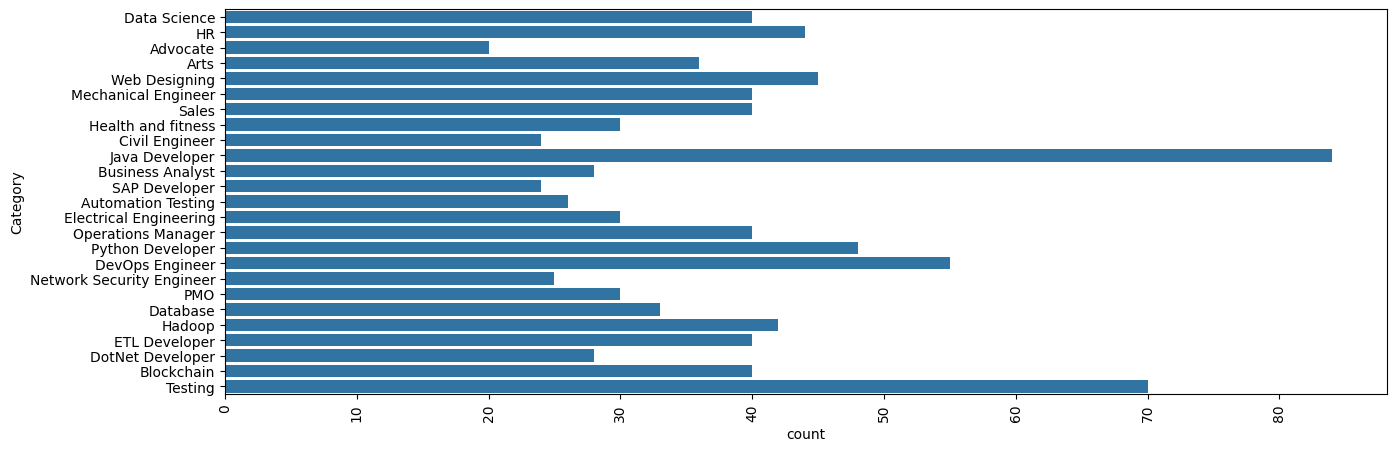

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [62]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

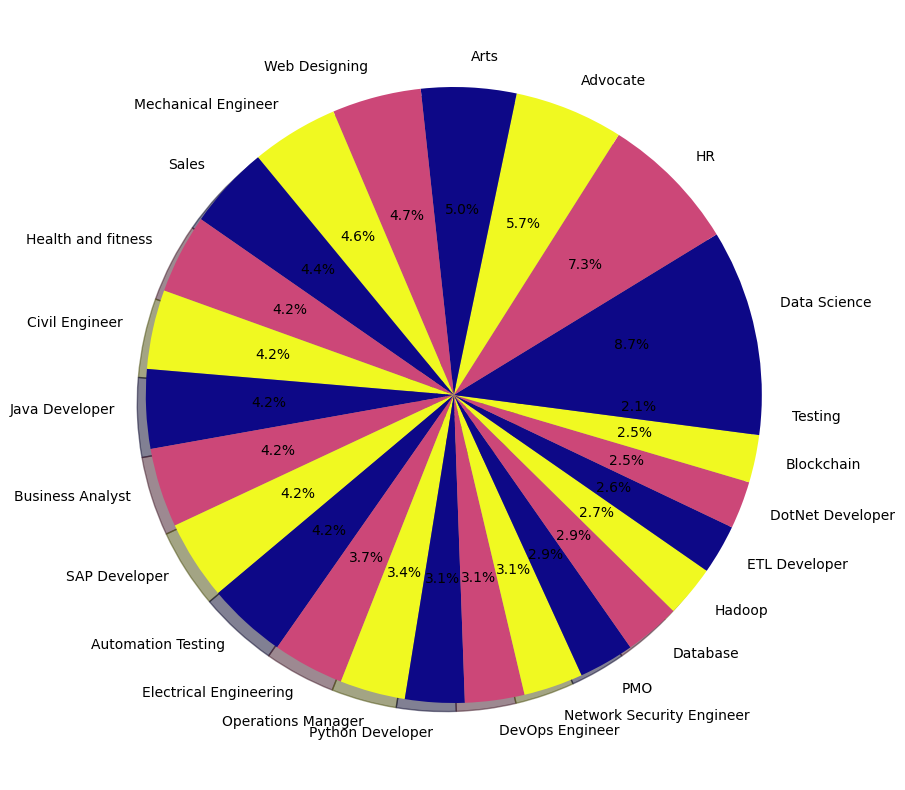

In [63]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Exploring Resume

In [64]:
df['Category'][0]

'Data Science'

In [65]:

df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Balance Classes (Categories)

In [66]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Mechanical Engineer          84
Blockchain                   84
DotNet

## Cleaning Data:

1 URLs,
2 hashtags,
3 mentions,
4 special letters,
5 punctuations:

In [67]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [68]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [69]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [70]:
df['Resume'][0]

'Education Details January 2018 Bachelor s of Engineering Engineering Mumbai Maharashtra MGM College of Engineering Diploma Mechanical Pune Maharashtra MIT President of Mechanical Engineering Student s Association President of Mechanical Engineering Student s Association Skill Details Company Details company Full Throttle description conducted by IIT Bombay Worked as a President of Mechanical Engineering Student s Association MESA in MIT Pune company R C Car Race of STEPCONE description paper project contest and exhibition conducted by GMR Instiute of Technology '

## words into categorical values

In [71]:
le = LabelEncoder()

In [72]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [73]:
df.Category.unique()

array([16,  3,  9, 11,  7, 17,  0,  4, 14, 22,  8, 10, 18, 20, 23,  2, 15,
       12, 24, 13,  1,  5, 21, 19,  6])

## Vactorization

In [74]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## Splitting

In [75]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)


In [76]:
X_train.shape

(1680, 7304)

In [77]:
X_test.shape

(420, 7304)

## Model Training 


Training Logistic Regression...

Accuracy: 0.9952

Classification Report for Logistic Regression:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        13
                     Arts       1.00      1.00      1.00        10
       Automation Testing       0.95      1.00      0.97        18
               Blockchain       1.00      1.00      1.00        19
         Business Analyst       1.00      1.00      1.00        20
           Civil Engineer       1.00      1.00      1.00        14
             Data Science       1.00      1.00      1.00        16
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.88      0.94        17
         DotNet Developer       0.96      1.00      0.98        22
            ETL Developer       1.00      1.00      1.00        16
   Electrical Engineering       1.00      1.00      1.00        19
                       HR    

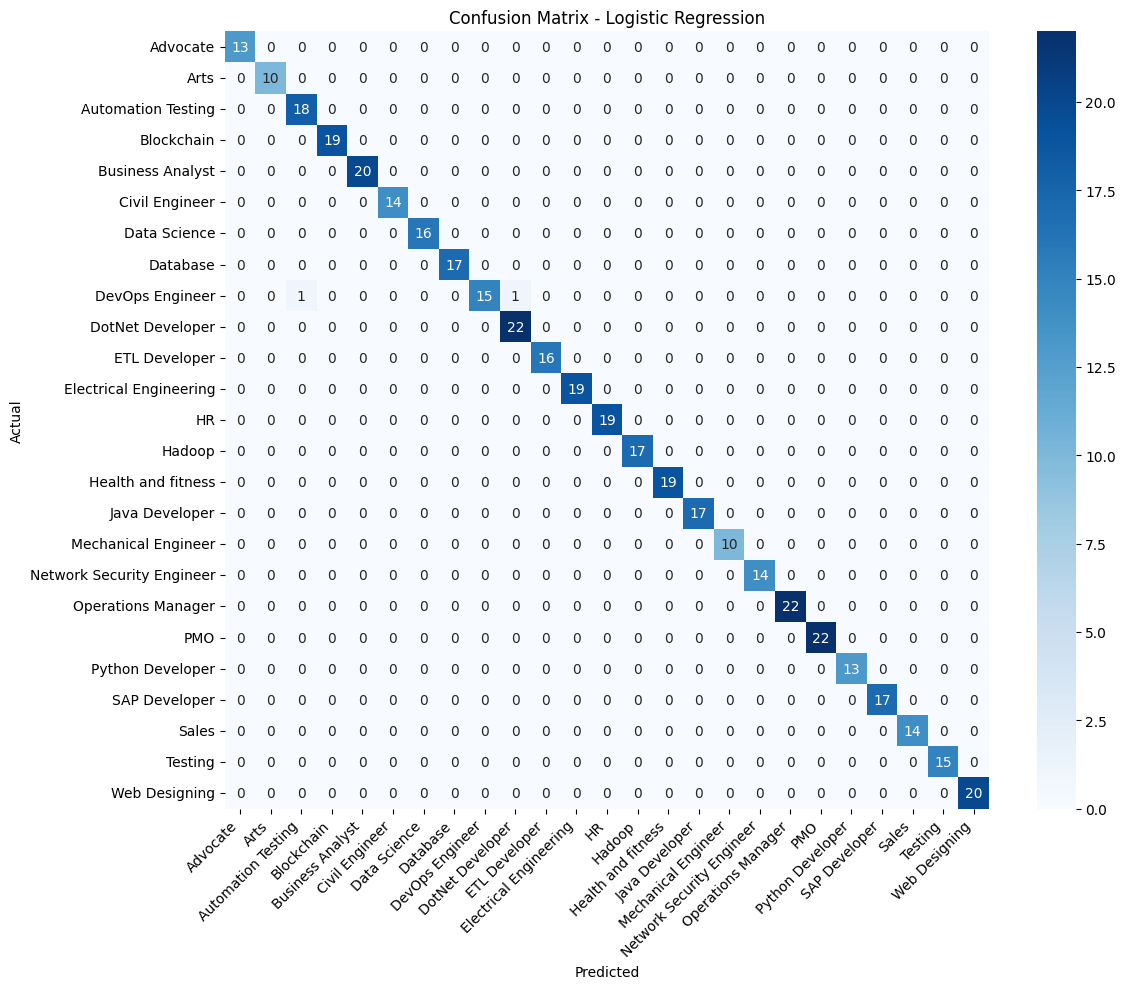


Training Random Forest...

Accuracy: 0.9976

Classification Report for Random Forest:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        13
                     Arts       1.00      1.00      1.00        10
       Automation Testing       0.95      1.00      0.97        18
               Blockchain       1.00      1.00      1.00        19
         Business Analyst       1.00      1.00      1.00        20
           Civil Engineer       1.00      1.00      1.00        14
             Data Science       1.00      1.00      1.00        16
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.94      0.97        17
         DotNet Developer       1.00      1.00      1.00        22
            ETL Developer       1.00      1.00      1.00        16
   Electrical Engineering       1.00      1.00      1.00        19
                       HR       1.00     

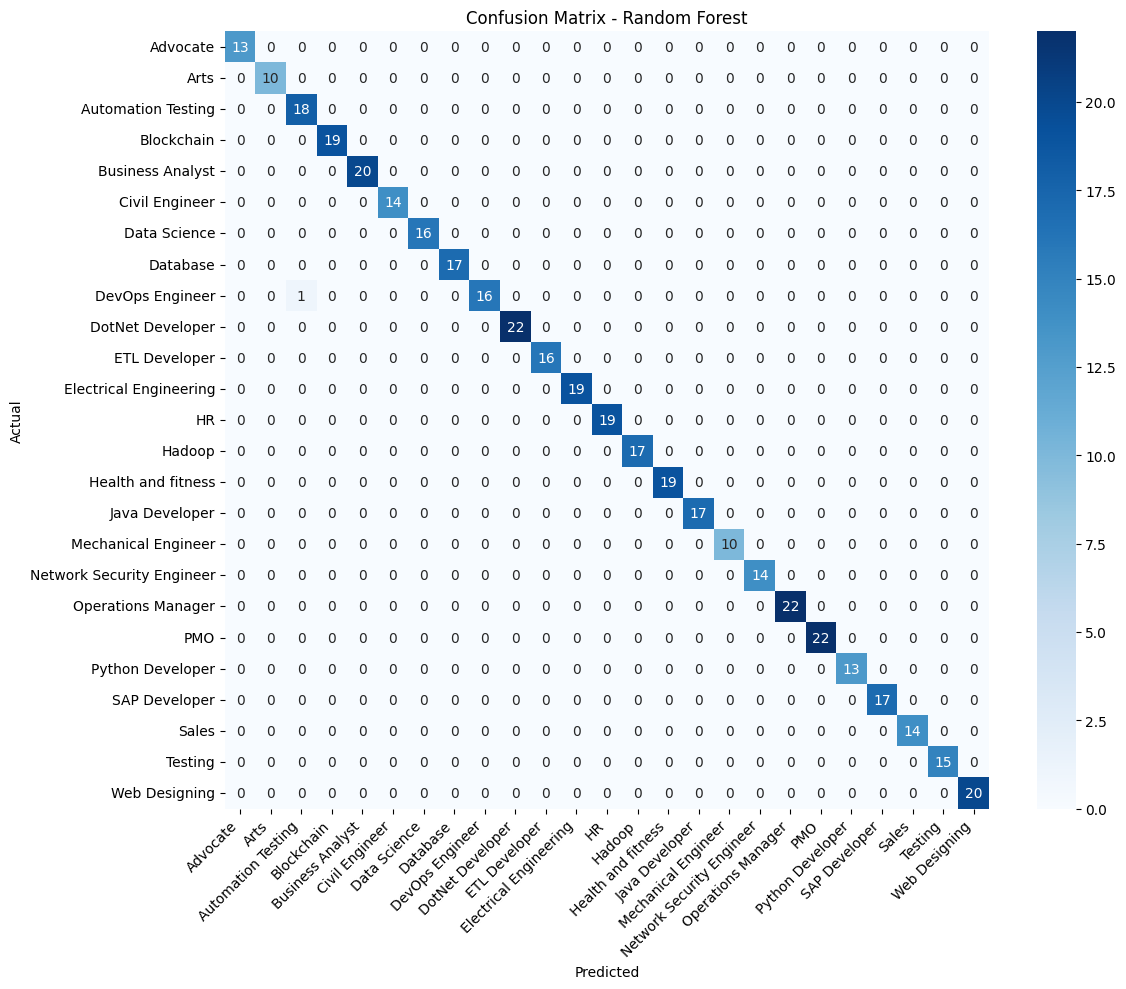


Training SVM...

Accuracy: 0.9976

Classification Report for SVM:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        13
                     Arts       1.00      1.00      1.00        10
       Automation Testing       0.95      1.00      0.97        18
               Blockchain       1.00      1.00      1.00        19
         Business Analyst       1.00      1.00      1.00        20
           Civil Engineer       1.00      1.00      1.00        14
             Data Science       1.00      1.00      1.00        16
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.94      0.97        17
         DotNet Developer       1.00      1.00      1.00        22
            ETL Developer       1.00      1.00      1.00        16
   Electrical Engineering       1.00      1.00      1.00        19
                       HR       1.00      1.00      1.00     

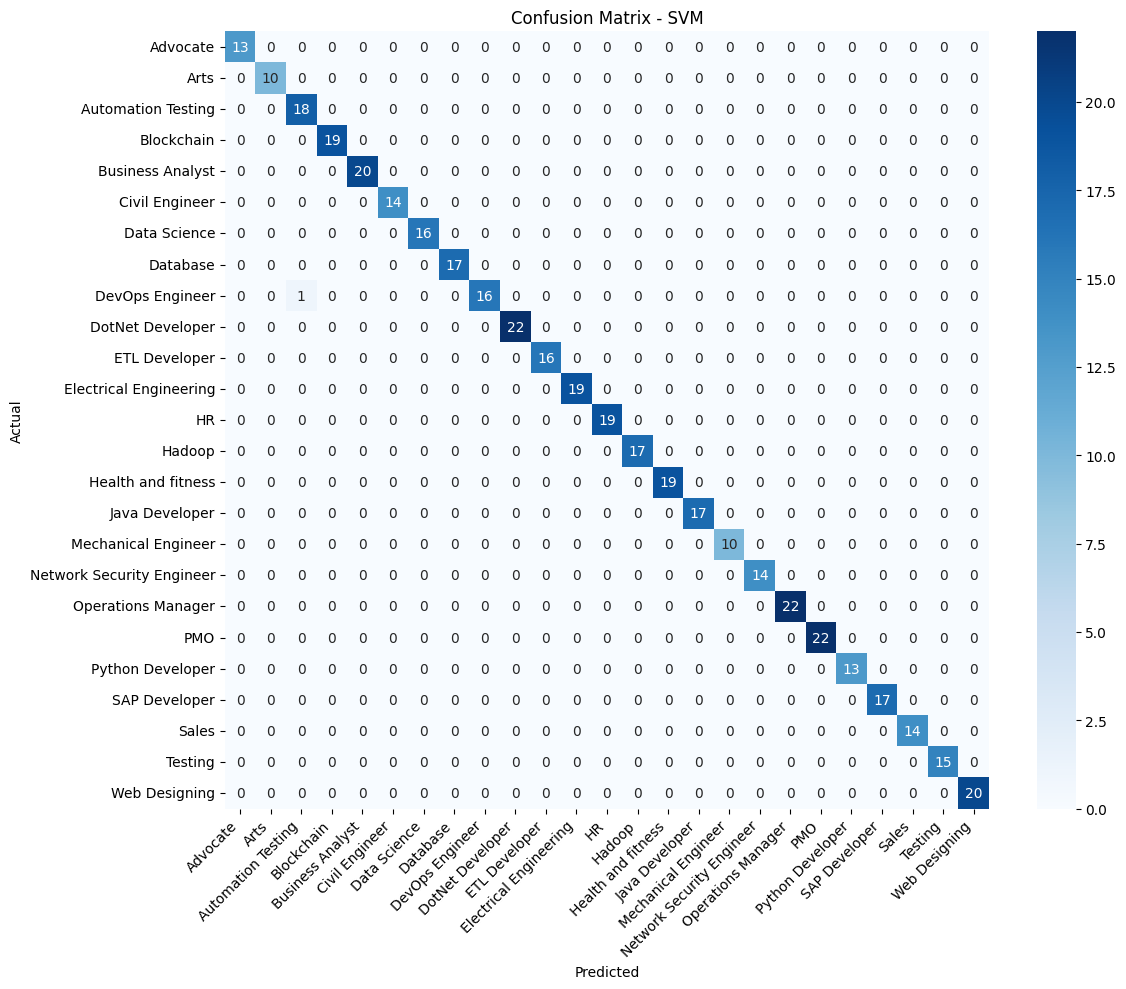


Training Naive Bayes...

Accuracy: 0.9929

Classification Report for Naive Bayes:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        13
                     Arts       1.00      1.00      1.00        10
       Automation Testing       0.94      0.94      0.94        18
               Blockchain       1.00      1.00      1.00        19
         Business Analyst       1.00      1.00      1.00        20
           Civil Engineer       1.00      1.00      1.00        14
             Data Science       1.00      1.00      1.00        16
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.88      0.94        17
         DotNet Developer       0.96      1.00      0.98        22
            ETL Developer       1.00      1.00      1.00        16
   Electrical Engineering       0.95      1.00      0.97        19
                       HR       1.00      1.0

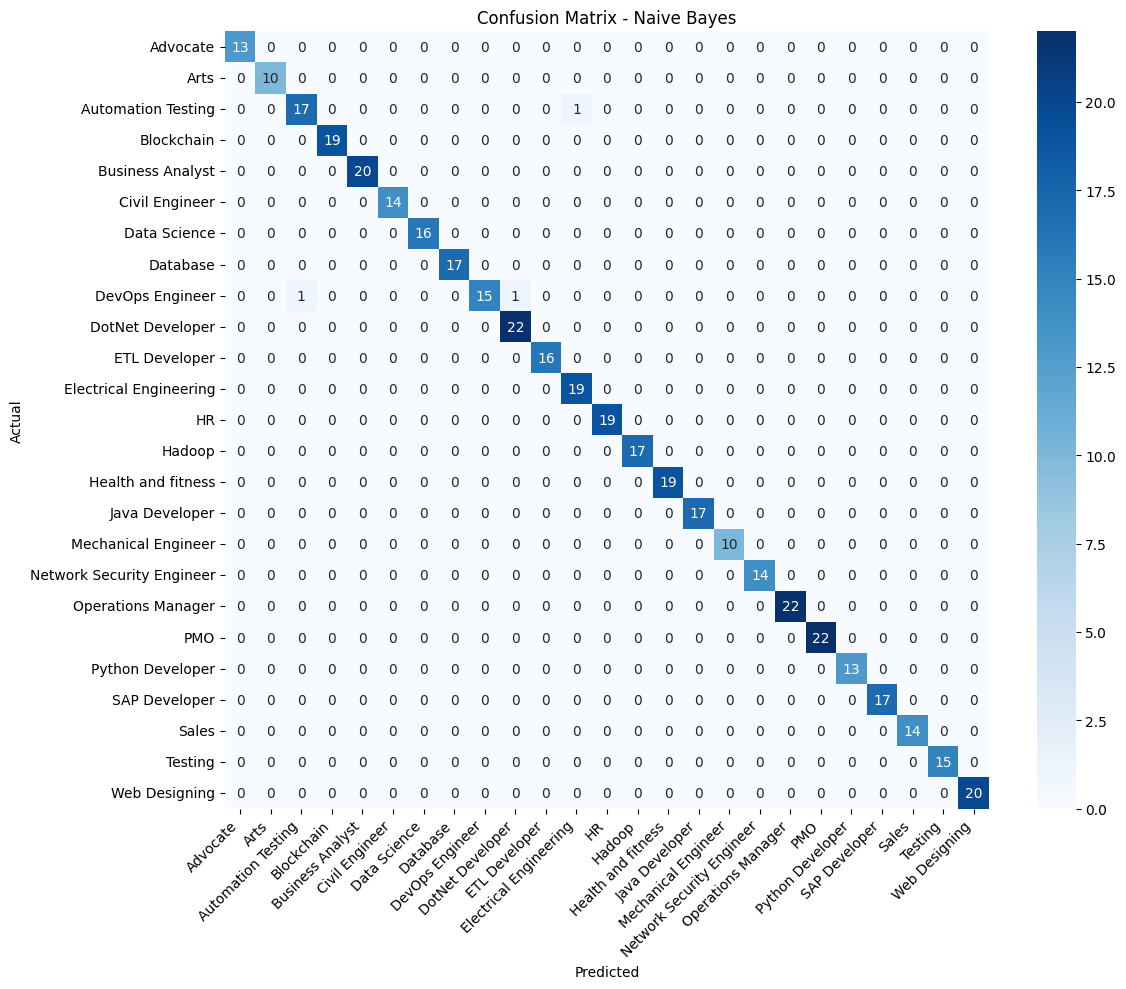

In [78]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"\nClassification Report for {name}:")
    
    # Get the unique labels present in test set and predictions
    unique_labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
    class_names = [str(le.inverse_transform([label])[0]) for label in unique_labels]
    
    print(classification_report(y_test, y_pred, labels=unique_labels, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


MODEL PERFORMANCE COMPARISON
1. Random Forest: 0.9976
2. SVM: 0.9976
3. Logistic Regression: 0.9952
4. Naive Bayes: 0.9929


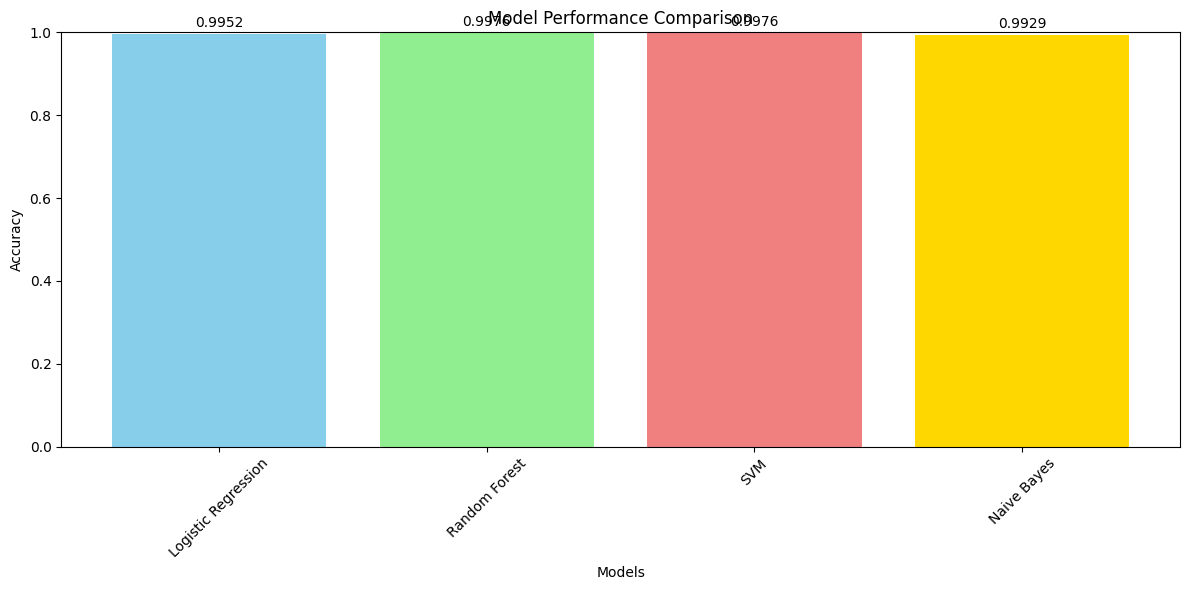


Best performing model: Random Forest with accuracy: 0.9976


In [79]:
# Compare model performance
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

for i, (model_name, accuracy) in enumerate(sorted_results, 1):
    print(f"{i}. {model_name}: {accuracy:.4f}")

# Visualize model comparison
plt.figure(figsize=(12, 6))
models_list = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(models_list, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\nBest performing model: {best_model_name} with accuracy: {best_accuracy:.4f}")

## Training vs Test Accuracy Analysis

Let's check training accuracy vs test accuracy to identify potential overfitting.

In [80]:
# Check Training vs Test Accuracy
print("\n" + "="*60)
print("TRAINING vs TEST ACCURACY ANALYSIS")
print("="*60)

train_accuracies = {}
performance_comparison = []

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 40)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies[name] = train_accuracy
    
    # Get test accuracy (already calculated)
    test_accuracy = results[name]
    
    # Calculate overfitting measure
    overfitting_gap = train_accuracy - test_accuracy
    
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy:     {test_accuracy:.4f}")
    print(f"Overfitting Gap:   {overfitting_gap:.4f}")
    
    # Store for comparison
    performance_comparison.append({
        'Model': name,
        'Training_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Overfitting_Gap': overfitting_gap
    })
    
    # Provide interpretation
    if overfitting_gap > 0.1:
        print("🔴 HIGH OVERFITTING - Model memorizing training data")
    elif overfitting_gap > 0.05:
        print("🟡 MODERATE OVERFITTING - Some memorization detected")
    elif overfitting_gap > 0:
        print("🟢 SLIGHT OVERFITTING - Normal learning behavior")
    else:
        print("🔵 NO OVERFITTING - Good generalization")

# Create DataFrame for easier comparison
comparison_df = pd.DataFrame(performance_comparison)
print(f"\n{comparison_df}")


TRAINING vs TEST ACCURACY ANALYSIS

Logistic Regression:
----------------------------------------
Training Accuracy: 0.9988
Test Accuracy:     0.9952
Overfitting Gap:   0.0036
🟢 SLIGHT OVERFITTING - Normal learning behavior

Random Forest:
----------------------------------------
Training Accuracy: 0.9988
Test Accuracy:     0.9952
Overfitting Gap:   0.0036
🟢 SLIGHT OVERFITTING - Normal learning behavior

Random Forest:
----------------------------------------
Training Accuracy: 1.0000
Test Accuracy:     0.9976
Overfitting Gap:   0.0024
🟢 SLIGHT OVERFITTING - Normal learning behavior

SVM:
----------------------------------------
Training Accuracy: 1.0000
Test Accuracy:     0.9976
Overfitting Gap:   0.0024
🟢 SLIGHT OVERFITTING - Normal learning behavior

SVM:
----------------------------------------
Training Accuracy: 1.0000
Test Accuracy:     0.9976
Overfitting Gap:   0.0024
🟢 SLIGHT OVERFITTING - Normal learning behavior

Naive Bayes:
----------------------------------------
Training

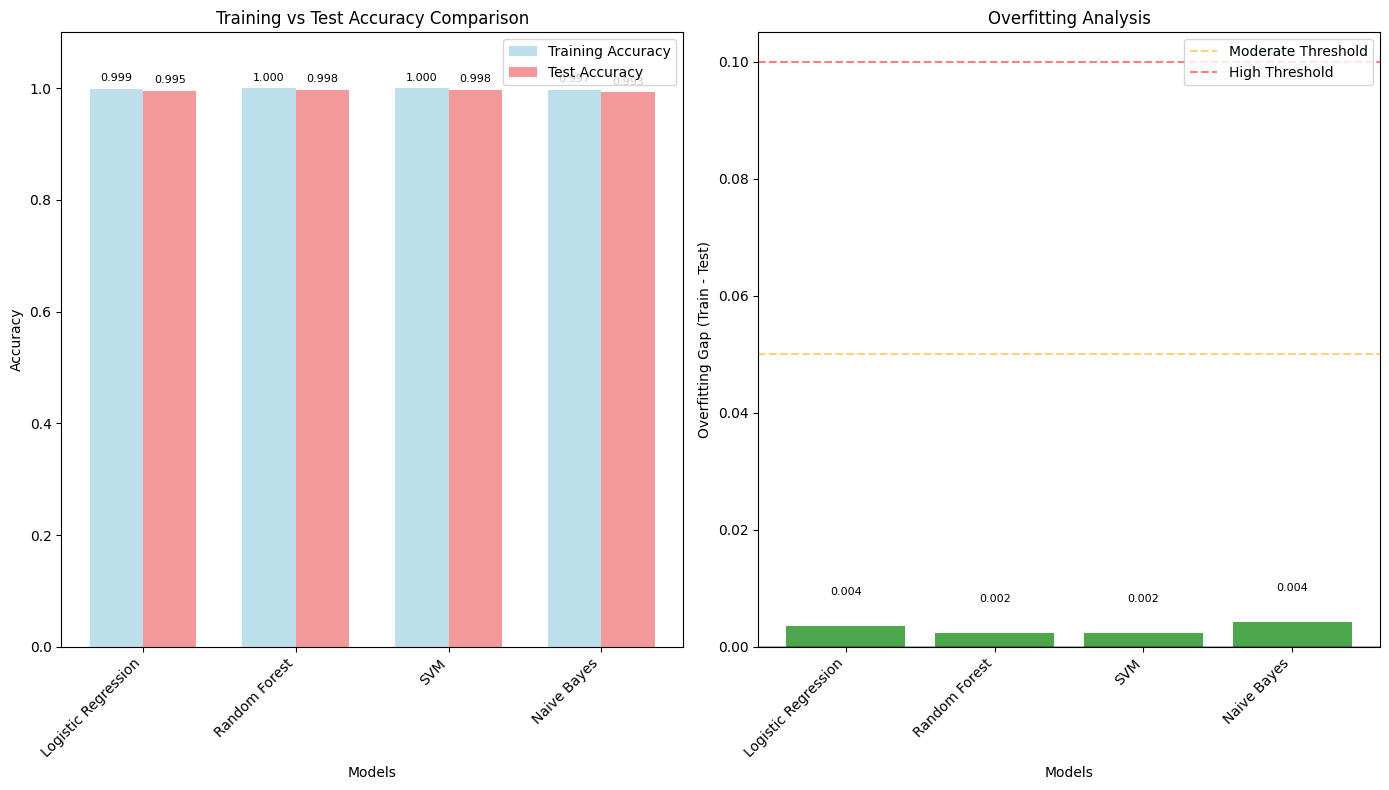

In [81]:
# Visualize Training vs Test Accuracy
plt.figure(figsize=(14, 8))

# Create subplot for side-by-side comparison
plt.subplot(1, 2, 1)
x = np.arange(len(comparison_df))
width = 0.35

bars1 = plt.bar(x - width/2, comparison_df['Training_Accuracy'], width, 
                label='Training Accuracy', alpha=0.8, color='lightblue')
bars2 = plt.bar(x + width/2, comparison_df['Test_Accuracy'], width, 
                label='Test Accuracy', alpha=0.8, color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy Comparison')
plt.xticks(x, comparison_df['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.1)

# Add accuracy values on bars
for bar, acc in zip(bars1, comparison_df['Training_Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontsize=8)

for bar, acc in zip(bars2, comparison_df['Test_Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontsize=8)

# Create subplot for overfitting gap
plt.subplot(1, 2, 2)
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' 
          for gap in comparison_df['Overfitting_Gap']]

bars3 = plt.bar(comparison_df['Model'], comparison_df['Overfitting_Gap'], 
                color=colors, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Overfitting Gap (Train - Test)')
plt.title('Overfitting Analysis')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.5, label='Moderate Threshold')
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='High Threshold')
plt.legend()

# Add gap values on bars
for bar, gap in zip(bars3, comparison_df['Overfitting_Gap']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{gap:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [82]:
# Detailed Analysis and Recommendations
print("\n" + "="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

# Summary statistics
avg_train_acc = comparison_df['Training_Accuracy'].mean()
avg_test_acc = comparison_df['Test_Accuracy'].mean()
avg_gap = comparison_df['Overfitting_Gap'].mean()

print(f"Average Training Accuracy: {avg_train_acc:.4f}")
print(f"Average Test Accuracy:     {avg_test_acc:.4f}")
print(f"Average Overfitting Gap:   {avg_gap:.4f}")

# Find best generalizing model (smallest gap with high performance)
comparison_df['Generalization_Score'] = comparison_df['Test_Accuracy'] - comparison_df['Overfitting_Gap']
best_generalizer = comparison_df.loc[comparison_df['Generalization_Score'].idxmax()]

print(f"\nBest Generalizing Model: {best_generalizer['Model']}")
print(f"  - Test Accuracy: {best_generalizer['Test_Accuracy']:.4f}")
print(f"  - Overfitting Gap: {best_generalizer['Overfitting_Gap']:.4f}")
print(f"  - Generalization Score: {best_generalizer['Generalization_Score']:.4f}")

# Models with concerning overfitting
high_overfitting = comparison_df[comparison_df['Overfitting_Gap'] > 0.1]
if not high_overfitting.empty:
    print(f"\n⚠️  Models with High Overfitting:")
    for idx, row in high_overfitting.iterrows():
        print(f"   {row['Model']}: Gap = {row['Overfitting_Gap']:.4f}")

# Perfect accuracy warning
perfect_models = comparison_df[comparison_df['Training_Accuracy'] == 1.0]
if not perfect_models.empty:
    print(f"\n🚨 Models with Perfect Training Accuracy:")
    for idx, row in perfect_models.iterrows():
        print(f"   {row['Model']}: This might indicate data leakage or overfitting")

print(f"\n📊 RECOMMENDATIONS:")
print(f"1. Focus on models with high test accuracy and low overfitting gap")
print(f"2. Consider regularization for models with high overfitting")
print(f"3. Validate results with cross-validation for more robust estimates")
if avg_gap > 0.05:
    print(f"4. Overall overfitting detected - consider data augmentation or regularization")
if any(comparison_df['Training_Accuracy'] == 1.0):
    print(f"5. Perfect training accuracy suggests possible data issues - investigate dataset")


DETAILED PERFORMANCE ANALYSIS
Average Training Accuracy: 0.9990
Average Test Accuracy:     0.9958
Average Overfitting Gap:   0.0031

Best Generalizing Model: Random Forest
  - Test Accuracy: 0.9976
  - Overfitting Gap: 0.0024
  - Generalization Score: 0.9952

🚨 Models with Perfect Training Accuracy:
   Random Forest: This might indicate data leakage or overfitting
   SVM: This might indicate data leakage or overfitting

📊 RECOMMENDATIONS:
1. Focus on models with high test accuracy and low overfitting gap
2. Consider regularization for models with high overfitting
3. Validate results with cross-validation for more robust estimates
5. Perfect training accuracy suggests possible data issues - investigate dataset


## Save Model and Preprocessing Components

Save the Random Forest model and necessary preprocessing components for future use.

In [85]:
# Train the Random Forest model on the full training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Saving model and preprocessing components...")
print("="*50)

# Save the TF-IDF vectorizer
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
print("✅ TF-IDF Vectorizer saved as 'tfidf.pkl'")

# Save the Random Forest model
pickle.dump(rf_model, open('clf.pkl', 'wb'))
print("✅ Random Forest Model saved as 'clf.pkl'")

# Save the Label Encoder
pickle.dump(le, open('encoder.pkl', 'wb'))
print("✅ Label Encoder saved as 'encoder.pkl'")

print(f"\n📁 Files saved successfully!")
print(f"   - tfidf.pkl: TF-IDF Vectorizer for text preprocessing")
print(f"   - clf.pkl: Random Forest Classifier model")
print(f"   - encoder.pkl: Label Encoder for category mapping")

# Verify model performance
print(f"\n🎯 Saved Model Performance:")
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"   Random Forest Test Accuracy: {rf_accuracy:.4f}")

Saving model and preprocessing components...
✅ TF-IDF Vectorizer saved as 'tfidf.pkl'
✅ Random Forest Model saved as 'clf.pkl'
✅ Label Encoder saved as 'encoder.pkl'

📁 Files saved successfully!
   - tfidf.pkl: TF-IDF Vectorizer for text preprocessing
   - clf.pkl: Random Forest Classifier model
   - encoder.pkl: Label Encoder for category mapping

🎯 Saved Model Performance:
   Random Forest Test Accuracy: 0.9976


In [ ]:
# Test loading the saved files to ensure they work properly
print("Testing saved files...")
print("="*30)

try:
    # Load the saved components
    loaded_tfidf = pickle.load(open('tfidf.pkl', 'rb'))
    loaded_model = pickle.load(open('clf.pkl', 'rb'))
    loaded_encoder = pickle.load(open('encoder.pkl', 'rb'))
    
    print("✅ All files loaded successfully!")
    
    # Test with a sample resume
    sample_resume = "Experienced software engineer with Python, machine learning, and data analysis skills"
    
    # Preprocess the sample
    cleaned_sample = cleanResume(sample_resume)
    vectorized_sample = loaded_tfidf.transform([cleaned_sample])
    
    # Make prediction
    prediction = loaded_model.predict(vectorized_sample)
    predicted_category = loaded_encoder.inverse_transform(prediction)[0]
    
    # Get prediction probability
    prediction_proba = loaded_model.predict_proba(vectorized_sample)
    confidence = max(prediction_proba[0]) * 100
    
    print(f"\n🧪 Test Prediction:")
    print(f"   Sample Resume: '{sample_resume}'")
    print(f"   Predicted Category: {predicted_category}")
    print(f"   Confidence: {confidence:.2f}%")
    
    print(f"\n✅ Model deployment ready!")
    
except Exception as e:
    print(f"❌ Error loading files: {e}")